In [3]:
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import random
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib.path import Path
import skimage.data

### For visualizing the outputs ###
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

C:\Users\mrric\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\mrric\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\mrric\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\mrric\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

In [4]:
dataDir='data'
dataType='val2017'
annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType)

# Initialize the COCO api for instance annotations
coco=COCO(annFile)

# Load the categories in a variable
catIDs = coco.getCatIds()
cats = coco.loadCats(catIDs)

print(cats)

loading annotations into memory...
Done (t=1.07s)
creating index...
index created!
[{'supercategory': 'person', 'id': 1, 'name': 'person'}, {'supercategory': 'vehicle', 'id': 2, 'name': 'bicycle'}, {'supercategory': 'vehicle', 'id': 3, 'name': 'car'}, {'supercategory': 'vehicle', 'id': 4, 'name': 'motorcycle'}, {'supercategory': 'vehicle', 'id': 5, 'name': 'airplane'}, {'supercategory': 'vehicle', 'id': 6, 'name': 'bus'}, {'supercategory': 'vehicle', 'id': 7, 'name': 'train'}, {'supercategory': 'vehicle', 'id': 8, 'name': 'truck'}, {'supercategory': 'vehicle', 'id': 9, 'name': 'boat'}, {'supercategory': 'outdoor', 'id': 10, 'name': 'traffic light'}, {'supercategory': 'outdoor', 'id': 11, 'name': 'fire hydrant'}, {'supercategory': 'outdoor', 'id': 13, 'name': 'stop sign'}, {'supercategory': 'outdoor', 'id': 14, 'name': 'parking meter'}, {'supercategory': 'outdoor', 'id': 15, 'name': 'bench'}, {'supercategory': 'animal', 'id': 16, 'name': 'bird'}, {'supercategory': 'animal', 'id': 17, 'n

In [12]:
# Define the classes (out of the 81) which you want to see. Others will not be shown.
filterClasses = ['pizza']

# Fetch class IDs only corresponding to the filterClasses
catIds = coco.getCatIds(catNms=filterClasses) 
# Get all images containing the above Category IDs
imgIds = coco.getImgIds(catIds=catIds)
print("Number of images containing all the  classes:", len(imgIds))

Number of images containing all the  classes: 153


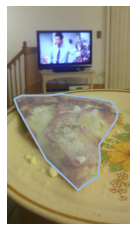

In [15]:
# load and display a random image
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
I = io.imread('{}/{}/{}'.format(dataDir,dataType,img['file_name']))/255.0

plt.imshow(I)
plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

The class name is cell phone


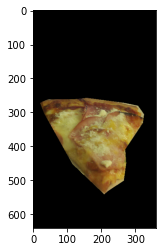

In [16]:
def getClassName(classID, cats):
    for i in range(len(cats)):
        if cats[i]['id']==classID:
            return cats[i]['name']
    return "None"
print('The class name is', getClassName(77, cats))

def segmentTo2DArray(segmentation):
    polygon = []
    for partition in segmentation:
        for x, y in zip(partition[::2], partition[1::2]):
            polygon.append((x,y))
    return polygon

def maskPixels(polygon):
    path = Path(polygon)
    xmin, ymin, xmax, ymax = np.asarray(path.get_extents(), dtype=int).ravel()
    x, y = np.mgrid[:img['width'], :img['height']]
    points = np.vstack((x.ravel(), y.ravel())).T
    mask = path.contains_points(points)
    path_points = points[np.where(mask)]
    img_mask = mask.reshape(x.shape).T
    return img_mask

mask = np.zeros((img['height'],img['width']))

polyVerts = segmentTo2DArray(anns[0]['segmentation'])
img_mask = maskPixels(polyVerts)
plt.imshow(I * img_mask[...,None])

# for i in range(len(anns)):
#     className = getClassName(anns[i]['category_id'], cats)
#     pixel_value = filterClasses.index(className)+1
#     mask = np.maximum(coco.annToMask(anns[i])*pixel_value, mask)
#     print(pixel_value)
# plt.imshow(mask)

7
[[[177 162 101]
  [177 162 101]
  [177 162 101]
  ...
  [177 162 101]
  [177 162 101]
  [177 162 101]]

 [[177 162 101]
  [177 162 101]
  [177 162 101]
  ...
  [177 162 101]
  [177 162 101]
  [177 162 101]]

 [[177 162 101]
  [177 162 101]
  [177 162 101]
  ...
  [177 162 101]
  [177 162 101]
  [177 162 101]]

 ...

 [[115 127 213]
  [115 127 213]
  [115 127 213]
  ...
  [115 127 213]
  [115 127 213]
  [115 127 213]]

 [[115 127 213]
  [115 127 213]
  [115 127 213]
  ...
  [115 127 213]
  [115 127 213]
  [115 127 213]]

 [[115 127 213]
  [115 127 213]
  [115 127 213]
  ...
  [115 127 213]
  [115 127 213]
  [115 127 213]]]


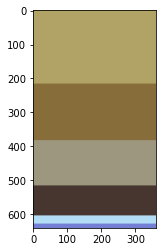

In [17]:
def getMaskColors(maskPixels):
    pixels = np.float32(maskPixels.reshape(-1, 3))
    
    n_colors = 6
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 200, .1)
    flags = cv2.KMEANS_RANDOM_CENTERS
    _, labels, palette = cv2.kmeans(pixels, n_colors, None, criteria, 10, flags)
    _, counts = np.unique(labels, return_counts=True)
    dominant = palette[np.argmax(counts)]
    
    return counts, palette*255.0

counts, palette = getMaskColors(I)

indices = np.argsort(counts)[::-1]
freqs = np.cumsum(np.hstack([[0], counts[indices]/counts.sum()]))
rows = np.int_((I * img_mask[...,None]).shape[0]*freqs)

print(len(rows))

dom_patch = np.zeros(shape=(I * img_mask[...,None]).shape, dtype=np.uint8)
for i in range(len(rows) - 1):
    dom_patch[rows[i]:rows[i + 1], :, :] += np.uint8(palette[indices[i]])

print(dom_patch)
    
plt.imshow(dom_patch)
# ax1.set_title('Dominant colors')
# ax1.axis('off')
# plt.show(ax1)

Loading images...
(427, 640, 3)
Stitching images...
Processing dominant colours...


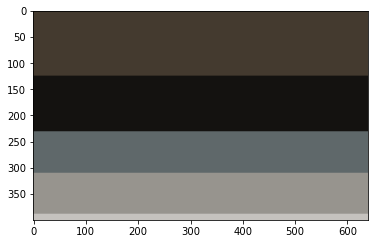

In [26]:
from PIL import Image

def getRawImages(filterClasses):
    catIds = coco.getCatIds(catNms=filterClasses)
    imgIds = coco.getImgIds(catIds=catIds)
    if len(imgIds) > 1000:
        imgIds = random.sample(imgIds, 1000)
    imgs = coco.loadImgs(imgIds)
    I_s = []
    for img in imgs:
        I = io.imread('{}/{}/{}'.format(dataDir, dataType, img['file_name'])) / 255.0
        I_s.append(I)
    return I_s


def stichImages(im_list, interpolation=cv2.INTER_CUBIC):
    w_min = min(im.shape[1] for im in im_list)
    im_list_resize = [cv2.resize(im, (w_min, int(im.shape[0] * w_min / im.shape[1])), interpolation=interpolation)
                      for im in im_list]
    return np.array(cv2.vconcat(im_list_resize))


# def stichImages(im_list, resample=Image.BICUBIC):
#     min_height = min((im.shape)[1] for im in im_list)
#     im_list_resize = [im.resize((int((im.shape)[0] * min_height / (im.shape)[1]), min_height),resample=resample)
#                       for im in im_list]
#     total_width = sum((im.shape)[0] for im in im_list_resize)
#     dst = Image.new('RGB', (total_width, min_height))
#     pos_x = 0
#     for im in im_list_resize:
#         dst.paste(im, (pos_x, 0))
#         pos_x += (im.shape)[0]
#     return dst


def getObjColors(image):
    n_colors = 10
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, .1)
    flags = cv2.KMEANS_RANDOM_CENTERS

    pixels = np.float32(image.reshape(-1, 3))
    _, labels, palette = cv2.kmeans(pixels, n_colors, None, criteria, 10, flags)
    _, counts = np.unique(labels, return_counts=True)

    dominant = palette[np.argmax(counts)]
    palette *= 255.0

    return counts, palette


def displayDominantColors(counts, palette):
    indices = np.argsort(counts)[::-1]   
    freqs = np.cumsum(np.hstack([[0], counts[indices]/counts.sum()]))
    rows = np.int_(640*freqs)
    dom_patch = np.zeros(shape=(400,640,3), dtype=np.uint8)
    for i in range(len(rows) - 1):
        dom_patch[rows[i]:rows[i + 1], :, :] += np.uint8(palette[indices[i]])
    return dom_patch


def getCatColors(filterClasses):
    print("Loading images...")
    images = getRawImages(filterClasses)
    print((images[0]).shape)
    print("Stitching images...")
    image = stichImages(images)
    print("Processing dominant colours...")
    counts, palette = getObjColors(image)
    color_patch = displayDominantColors(counts, palette)
    return color_patch

cat_colors = getCatColors(['table'])
# print(cat_colors)
plt.imshow(cat_colors)